## Mobilenet & Inception_v3

## 1. Tensorflow hub libaries, website and articles found very helful,

## 2. dataset from tensorflow googleapis, I have took only 100 images from each classes,

## 3. I have explained every step in this code.

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### This dataset contains five set of flowers and each class has 100 images, total of 500 images - as you said less then 1000 images

In [2]:
data_dir = "C:/Users/Admin/datasets/flower_photos"

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Admin/datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/Admin/datasets/flower_photos/daisy/14167543177_cd36b54ac6_n.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/daisy/14219214466_3ca6104eae_m.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/daisy/14221836990_90374e6b34.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/daisy/14245834619_153624f836.jpg')]

In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/Admin/datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 WindowsPath('C:/Users/Admin/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg')]

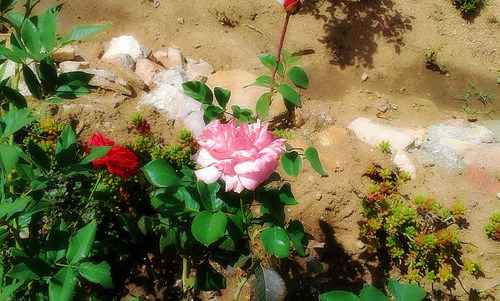

In [6]:
Image.open(str(roses[1]))

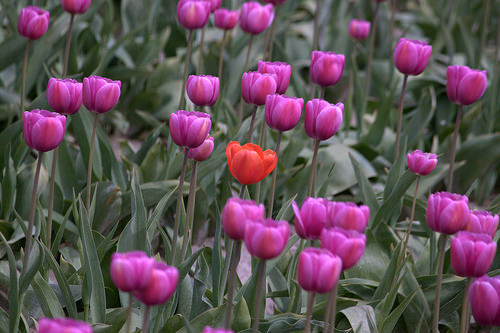

In [7]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

### labelling classes

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

### changing image size (224, 224) for m.build in mobilenet transfer learning

In [10]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

### image into array using numpy

In [11]:
X = np.array(X)
y = np.array(y)

### Train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images into 0 to 1

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## mobilenet pretrained model using tensorflow hub

In [14]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

## pretrained model with the last layer by adding number of classes = 5

In [15]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


## Only 10 epochs I have given...got 80% result in testing model

In [16]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 10s 600ms/step - loss: 1.4318 - acc: 0.4027
Epoch 2/10
12/12 [==============================] - 7s 588ms/step - loss: 0.8613 - acc: 0.7227
Epoch 3/10
12/12 [==============================] - 7s 599ms/step - loss: 0.6145 - acc: 0.8400
Epoch 4/10
12/12 [==============================] - 7s 568ms/step - loss: 0.4850 - acc: 0.8507
Epoch 5/10
12/12 [==============================] - 7s 585ms/step - loss: 0.3992 - acc: 0.8880
Epoch 6/10
12/12 [==============================] - 7s 604ms/step - loss: 0.3334 - acc: 0.9200
Epoch 7/10
12/12 [==============================] - 7s 605ms/step - loss: 0.2872 - acc: 0.9360
Epoch 8/10
12/12 [==============================] - 8s 656ms/step - loss: 0.2466 - acc: 0.9493
Epoch 9/10
12/12 [==============================] - 8s 670ms/step - loss: 0.2153 - acc: 0.9680
Epoch 10/10
12/12 [==============================] - 9s 782ms/step - loss: 0.1923 - acc: 0.9760


In [17]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 3s 566ms/step - loss: 0.5507 - acc: 0.8080


[0.5506916046142578, 0.8080000281333923]

## Inception_v3 

### image size (299, 299) for m.build in inception_v3 transfer learning

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(299,299))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### inception_v3 pretrained model using tensorflow hub
### this feature_vector model is pretrained but without the last layer
### trainable =  false because not to train, just freeze the model so that the weighs won't change in the model

In [22]:
feature_extractor_model = "https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/5"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

### pretrained model with the last layer by adding number of classes = 5

In [23]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [24]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 1.4240 - acc: 0.4133
Epoch 2/10
12/12 [==============================] - 26s 2s/step - loss: 0.8303 - acc: 0.7467
Epoch 3/10
12/12 [==============================] - 23s 2s/step - loss: 0.5524 - acc: 0.8853
Epoch 4/10
12/12 [==============================] - 24s 2s/step - loss: 0.4151 - acc: 0.9120
Epoch 5/10
12/12 [==============================] - 21s 2s/step - loss: 0.3219 - acc: 0.9573
Epoch 6/10
12/12 [==============================] - 25s 2s/step - loss: 0.2711 - acc: 0.9627
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 0.2292 - acc: 0.9760
Epoch 8/10
12/12 [==============================] - 24s 2s/step - loss: 0.1975 - acc: 0.9840
Epoch 9/10
12/12 [==============================] - 23s 2s/step - loss: 0.1752 - acc: 0.9840
Epoch 10/10
12/12 [==============================] - 22s 2s/step - loss: 0.1611 - acc: 0.9840


## inception_v3 model performce better in testing result

In [25]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 7s 2s/step - loss: 0.4123 - acc: 0.8400


[0.4122842848300934, 0.8399999737739563]

##  __________________________________________________________________________